In [1]:
import time

def timelimit_primes(s=5):
    '''
    Generates prime numbers up to a time limit in seconds (s).
    '''
    primes = []
    n = 2
    t0=time.time()
    while (time.time()-t0)<s:
    
        if all(n%p!=0 for p in primes):
            primes.append(n)
            yield n

        n+=1
        
def limit_primes(limit):
    '''
    Generates prime numbers up to a time limit in seconds (s).
    '''
    primes = set()
    n = 2
    while n<=limit:
    
        if all(n%p!=0 for p in primes):
            primes.add(n)
        n+=1
    return primes

def eratos_primes(limit):
    '''
    Returns primes less than or equal to limit using Eratosthenes' Sieve.
    '''
    primes = set()
    non_primes = set()
    for n in range(2, limit+1):
        if n not in non_primes:
            primes.add(n)
            for np in range(n*2, limit+1, n):
                non_primes.add(np)
                
    return primes

def get_factors(n):
    
    res = []
    primes = get_primes(n)
    
    for p in sorted(primes):
        while n%p==0:
            res.append(p)
            n/=p
    
    return res

def fractions(n):
    '''
    Return numerator and denominator of fraction
    '''
    sign = 1
    if n < 0:
        n=-n
        sign*=-1
    
    num, denom = 0, 1

    while (num/denom) != n:
        if (num/denom) > n:
            denom += 1
        else:
            num += 1
            
    return sign*num, denom
    

In [198]:
from copy import deepcopy

class Matrix(object):
    
    def __init__(self, *args):
         
        try: # if arguments are iterable
            iter(args[0])
            if len(args)==1: # if only one argument
                try:
                    iter(args[0][0]) # test if list of list
                    args = args[0] # arg as only element
                except:
                    args=[args[0]] # set only argument as list of list

        except: # else wrap elements in list
            args = [list(args)]

        self._data = [list(a) for a in args]
        self.dimensions # check dimensions
        
    def __repr__(self):
        
        
        data = deepcopy(self._data)
        for i, j in self._positions:
            data[i][j] = round(data[i][j], 2)
            
        header = 'Matrix('
        res = str(data).replace('],','],\n' + ' '*len(header))
        return f'{header}{res})'
    
    def __getitem__(self, key):
        
        r, c = key
        if not type(r)==slice:
            if not type(c)==slice:
                return self._data[r][c]
            else:
                r = slice(r,r+1)
        if not type(c)==slice:
            c = slice(c,c+1)
            
        m, n = self.dimensions
        rstop = r.stop if r.stop else m
        cstop = r.stop if r.stop else n
        
        data = []
        for i in range(*r.indices(rstop)):
            row = []
            for j in range(*c.indices(cstop)):
                row.append(self._data[i][j])
            data.append(row)
            
        return Matrix(data)
    
    def __setitem__(self, key, value):
        
        r, c = key
        self._data[r][c] = value
        
    def __add__(self, other):
        
        res = deepcopy(self)
        
        if type(self)==type(other):
            if res.dims != other.dims:
                raise Exception('Matrices must have same dimensions')
            for pos in res._positions:
                res[pos] += other[pos]
                
        else:
            for pos in res._positions:
                res[pos] += other
        
        return res

    # addition and subtraction
    def __radd__(self, other):
        return self + other
    
    def __neg__(self):
        
        res = deepcopy(self)
        for pos in res._positions:
            res[pos] = -res[pos]
        return res
    
    def __pos__(self):
        return self
    
    def __sub__(self, other):
        res = deepcopy(self)
        
        if type(self)==type(other):
            if res.dims != other.dims:
                raise Exception('Matrices must have same dimensions')
            res += (-other)
        else:
            for pos in res._positions:
                res[pos] += other
                
        return res
    
    def __rsub__(self, other):
        res = deepcopy(self)
        return -res + other
    
    # matrix multiplication
    
    def __mul__(self, other):

        if type(self)==type(other):
            if self.dimensions[1] != other.dimensions[0]:
                raise Exception('Matrices dimensions not aligned: MxN NxR')
        
            m, n = self.dimensions
            n, r = other.dimensions
            res = []
            # for row in left matrix
            for i in range(m):
                row = []
                # for column in right matrix
                for k in range(r):
                    s = 0
                    # for left-col/right-row
                    for j in range(n):
                        s += self[i,j]*other[j,k]
                    s = round(s, 10)
                    s = 0 if s==0 else s
                    row.append(s)
                res.append(row)
            
            return Matrix(res)
            
        else:
            res = deepcopy(self)
            for pos in res._positions:
                res[pos] *= other
            return res
            
    def __rmul__(self, other):
        
        if type(self)==type(other):
            return other * self
        else:
            return self * other
    
    def __matmul__(self, other):
        return self * other
    
    def __rmatmul__(self, other):
        return other * self
    
    # powers
    def __pow__(self, other):
        
        res = deepcopy(self)
        
        if other > 0:
            for _ in range(other-1):
                res = res * self
            return res
        
        elif other < 0:
            res = res.inverse()
            for _ in range(-other-1):
                res = res * self.inverse()
                
            return res
            
        else:
            return self.identity()
            
    # transpose
    def transpose(self):
        
        data = []
        r, c = self.dimensions
        for j in range(c):
            row = []
            for i in range(r):
                row.append(self[i,j])
            data.append(row)
            
        return Matrix(data)
    
    @property
    def T(self):
        return self.transpose()
    
    
    @property
    def _positions(self):
        
        r, c = self.dimensions
        
        coords = []
        for i in range(r):
            for j in range(c):
                coords.append((i,j))
        return tuple(coords)
    
    # dimensions
    @property
    def dimensions(self):
        
        outer = len(self._data)
        inner = len(self._data[0])
        for x in self._data:
            if len(x) != inner:
                raise Exception("All inner vectors must have same length")
        
        return (outer, inner)
    
    @property
    def dims(self):
        return self.dimensions
    
    def is_square(self):
        m, n = self.dimensions
        return m==n
    
    def is_vector(self):
        return 1 in self.dimensions
    
    def is_zero(self):
        return all(self[pos]==0 for pos in self._positions)
    
    def is_identity(self):
        return self._data == self.I._data
    
    def __eq__(self, other):
        if type(other)==type(self):
            return other._data == self._data
        elif other==0:
            return self.is_zero()
        elif other==1:
            return self.is_identity()
        else:
            return self._data == other
    
    # square matrix properties
    def identity(self, n=None):
        
        if not n:
            if self.is_square():
                n=self.dimensions[0]
            else:
                return None # must be square to have identity
        
        data = [[0]*n for _ in range(n)]
        
        for i in range(n):
            data[i][i] = 1
            
        return Matrix(data)
    
    @property
    def I(self):
        return self.identity()
    
    @property
    def trace(self):
        if not self.is_square():
            return None
        
        res = 0
        n=self.dimensions[0]
        for i in range(n):
            res += self[i,i]
        return res
    
    @property
    def norm(self):
        if self.is_vector():
            s = 0
            for pos in self._positions:
                s+=(self[pos]**2)
            return s**(1/2)
        else:
            return None
        
    def minor(self, *coords):
        if len(coords)==1:
            coords = coords[0]
        c_i, c_j = coords
        m, n = self.dimensions
        
        data = []
        for i in range(m):
            if i!=c_i:
                row = []
                for j in range(n):
                    if j!=c_j:
                        row.append(self[i,j])
                data.append(row)
        
        return Matrix(data).determinant()
    
    def cofactor(self, *args):
        return ((-1)**(sum(args))) * self.minor(*args)

    def adjoint(self):
        m,n = self.dimensions
        data=[]
        for i in range(m):
            row=[]
            for j in range(n):
                row.append(self.cofactor(i,j))
            data.append(row)
        return Matrix(data).T
    
    @property
    def Adj(self):
        return self.adjoint()
    
    def inverse(self):
        det = self.determinant()
        if det:
            return (1/det) * self.adjoint()
        else:
            return None
        
    @property
    def Inv(self):
        return self.inverse()
    
    def determinant(self):
        
        if self.is_square():
            
            n = self.dimensions[0]
            if n==1:
                return self[0, 0]
            else:
                return sum([self[i,0]*self.cofactor(i,0) for i in range(n)])
            
        else:
            return None
        
    @property
    def det(self):
        return self.determinant()

In [384]:
m = Matrix([1,1,2],[3,4,5],[6,7,8])
v = 0.30419711184
v = -0.73432132246
round((m - v*m.I).det,0)

-0.0

In [385]:
A = Matrix([1,2],[2,4])

In [386]:
import matplotlib.pyplot as plt

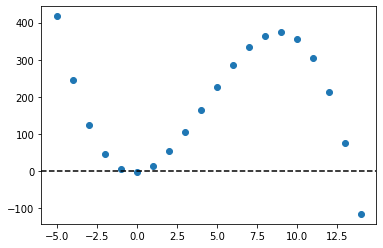

In [402]:
x,y = [], []
for i in range(-5, 15):
    v = i#*(0.01)
    d = (m - v*m.I).det
    x.append(v)
    y.append(d)
    
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.axhline(y=0, linestyle='--', c='black')

In [218]:

class Var(object):
    def __init__(self, sym='x', value=None):
        self.vars = {sym:{'coeff':1,'power':1}}
        self.const = 0
        self.value = value
        
    def __repr__(self):
        if self.value:
            return str(self.to_int())
        else:
            
            
            res = '' 
            for sym in self.vars:
                
                var = self.vars[sym]
                
                coeff = var['coeff']
                power = var['power']
                
                if coeff != 1:
                    res += str(coeff)
                
                res += str(sym)
                
                if power != 1:
                    res += ('**'+str(power))
                    
            if self.const != 0:
                
                if self.const>0:
                    res += (' + '+str(self.const)) 
                else:
                    res += (' - '+str(-self.const))
                
            return res

    def __add__(self, other):
        
        res = deepcopy(self)
        
        if type(other)==type(res):
            if res.var==other.var:
                res.const += other.const
                if res.power==other.power:
                    res.coeff += other.coeff
        else:
            res.const += other
        return res
    
    def to_int(self):
        if self.value:
            return (self.coeff*
                    (self.value**self.power)+
                    self.const)